# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | After travelling London to ...
1,✅ Trip Verified | My luggage was mis-tagged i...
2,✅ Trip Verified | The airline lost my luggage...
3,✅ Trip Verified | We booked on the BA website...
4,✅ Trip Verified | First time flying with BA b...


In [4]:
df.to_csv("Task 1/data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):
    print(f"Scraping page {i}")
    
    # Create the URL for each page of reviews
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
    content = response.content
    
    # Parse the HTML content using BeautifulSoup
    parsed_content = BeautifulSoup(content, 'html.parser')
    
    # Find all the review divs with class "text_content" and extract the text
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        review_text = para.get_text()
        
        # Remove the unnecessary text "✅ Trip Verified" from each review
        review_text = review_text.replace("✅ Trip Verified", "")
        
        # Remove the "|" symbol from each review
        review_text = review_text.replace("|", "")
        
        # Add the cleaned review text to the reviews list, stripping leading/trailing whitespaces
        reviews.append(review_text.strip())
    
    print(f"   ---> {len(reviews)} total reviews")

df = pd.DataFrame()
df["reviews"] = reviews
df.head()

# Save the DataFrame to a CSV file named "BA_clean_reviews.csv" in the "data" folder
df.to_csv("Task 1/data/BA_clean_reviews.csv", index=False)

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


Topic 1: ba flight row passengers crew staff food one london amsterdam
Topic 2: late ba flight delayed london paris usa buses points belfast
Topic 3: flight ba check good lounge service boarding london plane security
Topic 4: flight ba service seat london crew food good class time
Topic 5: bangalore mins loudly berlin absolutely points indifferent impressed abysmal lounges



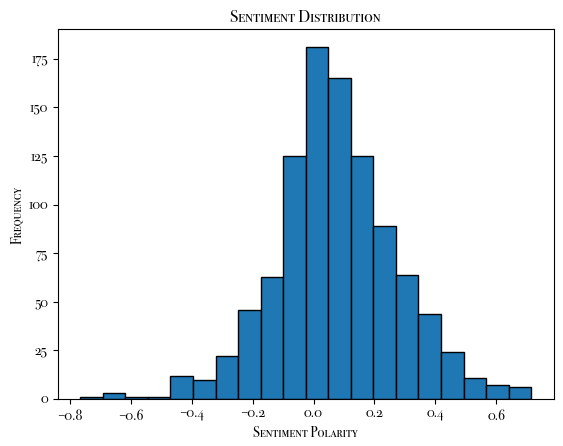

In [22]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Load the cleaned reviews from the CSV file
df = pd.read_csv("Task 1/data/BA_clean_reviews.csv")

# Perform topic modeling using Latent Dirichlet Allocation (LDA)
n_topics = 5  # Number of topics to extract
n_words = 10  # Number of words to display per topic

# Preprocess the text data
stop_words = stopwords.words("english")
vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(df["reviews"])

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)

# Extract the top words for each topic
feature_names = vectorizer.get_feature_names_out()
topics = []
for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-n_words - 1:-1]]
    topics.append(top_words)

# Print the topics
for topic_idx, top_words in enumerate(topics):
    print(f"Topic {topic_idx + 1}: {' '.join(top_words)}")
print()

# Perform sentiment analysis on the reviews
sentiments = df["reviews"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot the sentiment distribution
plt.hist(sentiments, bins=20, edgecolor='black')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.show()

In [61]:
# Perform Topic Modeling
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['reviews'])
feature_names = vectorizer.get_feature_names_out()

num_topics = 5  # Define the number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Print the top words for each topic
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx+1}:")
    top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    print(", ".join(top_words))
    print()

Topic #1:
ba, business, seats, water, food, class, passengers, boarding, cabin, check

Topic #2:
flight, london, airways, luggage, british, airport, hours, ba, delayed, heathrow

Topic #3:
class, seat, business, ba, flight, seats, economy, food, service, premium

Topic #4:
flight, ba, customer, service, booked, british, refund, told, cancelled, airways

Topic #5:
flight, good, crew, service, food, time, cabin, ba, boarding, london



In [64]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis to each review
df['sentiment_score'] = df['reviews'].apply(get_sentiment)

In [65]:
for index, row in df.iterrows():
    review = row['reviews']
    sentiment_score = row['sentiment_score']
    print(f"Review: {review}")
    print(f"Sentiment Score: {sentiment_score}")
    print("-----")


Review: After travelling London to Madrid with British Airways, then with Iberia from Madrid to Lima and LATAM to Cuzco, my luggage arrived 7 days after me. When attempting to collect my luggage, mine was the only one not to arrive. I sought help and was informed to make a claim online. When my bag finally arrived 7 days later, the lock had been forced open and everything inside the case searched. Someone emptied my 1st aid kit and toiletries and threw my clothing about, I felt violated. I have been treated appallingly from start to finish. For a month, I have been back and forth to British Airways, yet they stated it is not their fault.
Sentiment Score: -0.07222222222222223
-----
Review: My luggage was mis-tagged in Dallas on my way to Cairo via London. My Luggage arrived at LHR as planned on Saturday 6/24. However, upon arrival due to the luggage being mis-tagged and having the incorrect name on my luggage, it was never sent to Cairo. Its sitting in Terminal 3 in LHR (I have an air t

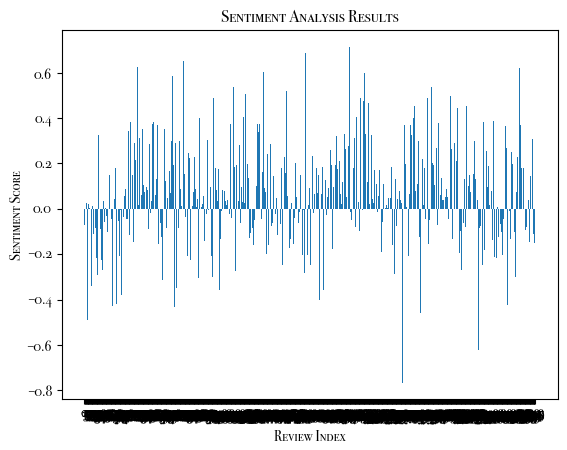

In [66]:
import matplotlib.pyplot as plt

# Create a bar plot
plt.bar(df.index, df['sentiment_score'])

# Set the x-axis labels to be the review indices
plt.xticks(df.index)

# Set the x-axis label
plt.xlabel('Review Index')

# Set the y-axis label
plt.ylabel('Sentiment Score')

# Set the title of the graph
plt.title('Sentiment Analysis Results')

# Display the plot
plt.show()


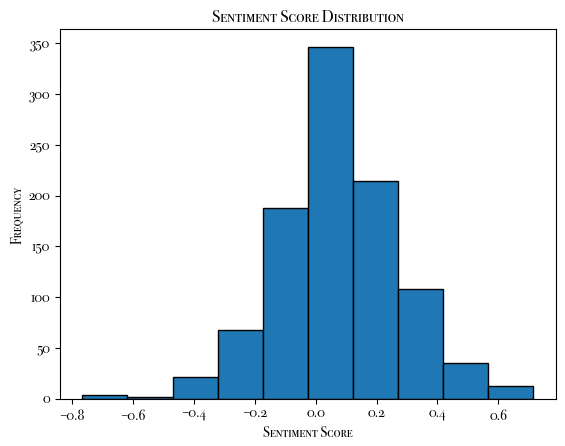

In [67]:
import matplotlib.pyplot as plt

# Create a histogram
plt.hist(df['sentiment_score'], bins=10, edgecolor='black')

# Set the x-axis label
plt.xlabel('Sentiment Score')

# Set the y-axis label
plt.ylabel('Frequency')

# Set the title of the graph
plt.title('Sentiment Score Distribution')

# Display the plot
plt.show()


In [68]:
import plotly.graph_objects as go

# Create a histogram trace
histogram = go.Histogram(
    x=df['sentiment_score'],
    nbinsx=10,
    marker=dict(color='blue'),
    opacity=0.75
)

# Create a layout
layout = go.Layout(
    title='Sentiment Score Distribution',
    xaxis=dict(title='Sentiment Score'),
    yaxis=dict(title='Frequency'),
    bargap=0.2
)

# Create the figure
fig = go.Figure(data=[histogram], layout=layout)

# Show the figure
fig.show()


In [78]:
import pandas as pd

# Function to extract top words
def get_top_words(text, n=10):
    word_list = text.split()
    word_freq = pd.Series(word_list).value_counts()
    top_words = ' '.join(word_freq.index[:n])
    return top_words

# Group the dataframe by sentiment score and get the top words for each group
top_words_per_sentiment = df.groupby('sentiment_score')['reviews'].apply(lambda x: get_top_words(' '.join(x), n=10)).reset_index()

# Convert the sentiment score and top words to text format
top_words_per_sentiment['sentiment_score'] = top_words_per_sentiment['sentiment_score'].astype(str)
top_words_per_sentiment['reviews'] = top_words_per_sentiment['reviews'].astype(str)

# Display the top words per sentiment score
for row in top_words_per_sentiment.itertuples(index=False):
    sentiment_score = row.sentiment_score
    top_words = row.reviews
    print(f"Sentiment Score: {sentiment_score}")
    print(f"Top Words: {top_words}\n")


Sentiment Score: -0.7666666666666666
Top Words: on to be The worst I have the and you

Sentiment Score: -0.65
Top Words: was and for I have meal Stockholm were overbooked. The

Sentiment Score: -0.6333333333333333
Top Words: and San I working. The crew couldn’t care less, will

Sentiment Score: -0.6229166666666667
Top Words: was a breakfast with in fruit bar. It wrapped Miami

Sentiment Score: -0.5625
Top Words: a with Not wrap Terrible. Then went to Traditional Breakfast

Sentiment Score: -0.48928571428571427
Top Words: and is are experience years behind other airlines. Seats cramped

Sentiment Score: -0.46190476190476193
Top Words: to and crew the business class mashed disgusting. salad dry

Sentiment Score: -0.45999999999999996
Top Words: and was on a of The in no delayed that

Sentiment Score: -0.45
Top Words: I they and to get the have am service is

Sentiment Score: -0.44000000000000006
Top Words: to a and was we Food is Istanbul business lounge

Sentiment Score: -0.4375
Top Word

In [77]:
import plotly.express as px
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Define the stopwords to remove
stop_words = set(stopwords.words('english'))

# Function to extract top words and remove stopwords
def get_top_words(text, n=10):
    word_list = text.split()
    word_list = [word.lower() for word in word_list if word.lower() not in stop_words]
    word_freq = pd.Series(word_list).value_counts()
    top_words = ' '.join(word_freq.index[:n])
    return top_words

# Group the dataframe by sentiment score and get the top words for each group
top_words_per_sentiment = df.groupby('sentiment_score')['reviews'].apply(lambda x: get_top_words(' '.join(x), n=10)).reset_index()

# Create a bar chart for each sentiment score
fig = px.bar(top_words_per_sentiment, x='sentiment_score', y='reviews', labels={'sentiment_score': 'Sentiment Score', 'reviews': 'Top Words'})

# Update the layout
fig.update_layout(
    title='Top 10 Words per Sentiment Score',
    xaxis_title='Sentiment Score',
    yaxis_title='Top Words',
    hovermode='closest',
)

# Show the interactive graph
fig.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/annabachmann/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


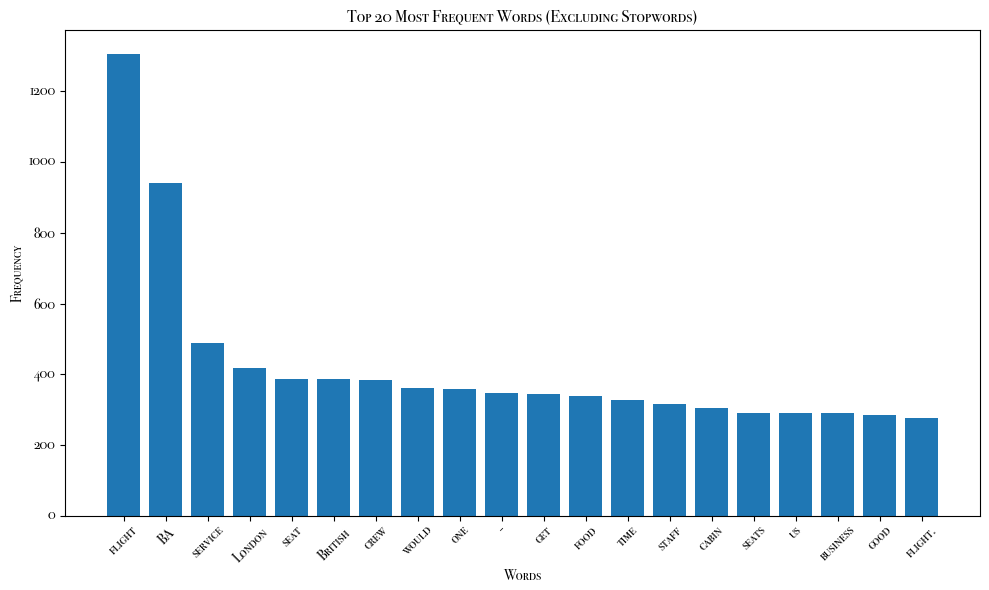

In [84]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords

# Combine all the reviews into a single string
all_reviews = ' '.join(reviews)

# Tokenize the string into words
words = all_reviews.split()

# Remove stopwords
stop_words = set(stopwords.words('english'))
words = [word for word in words if word.lower() not in stop_words]

# Count the frequency of each word
word_counts = Counter(words)

# Get the 20 most frequent words
top_words = word_counts.most_common(20)
words, counts = zip(*top_words)

# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words (Excluding Stopwords)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
